In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [12]:
file_path = "detecciones_1.csv"
df = pd.read_csv(file_path, delimiter=';')

df.head()

,Frame,Clase,ID,Xmin,Ymin,Xmax,Ymax
0,1,car,1,1073.378906,342.135498,1102.054688,367.734467
1,1,car,2,1773.040283,694.454590,1919.566772,784.268616
2,1,car,3,1624.669678,563.261475,1725.806641,642.807068
3,1,car,4,547.530945,363.711182,609.194275,394.096985
4,1,car,5,1567.792603,534.650024,1640.286255,595.249146


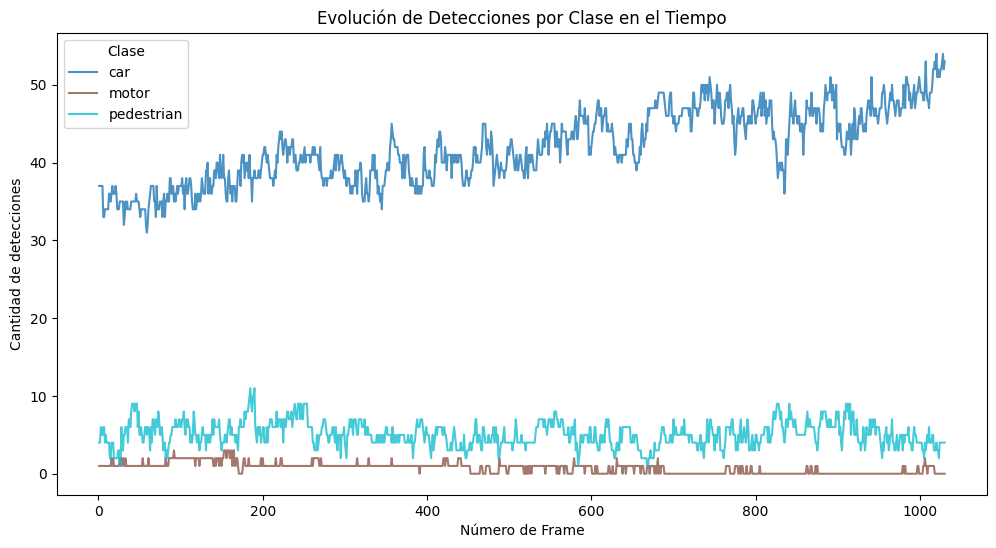

In [ ]:
#Grafico Lineas
detections_per_frame = df.groupby(["Frame", "Clase"]).size().unstack(fill_value=0)
detections_per_frame.plot(figsize=(12, 6), colormap="tab10", alpha=0.8)
plt.xlabel("Número de Frame")
plt.ylabel("Cantidad de detecciones")
plt.title("Evolución de Detecciones por Clase en el Tiempo")
plt.legend(title="Clase")
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

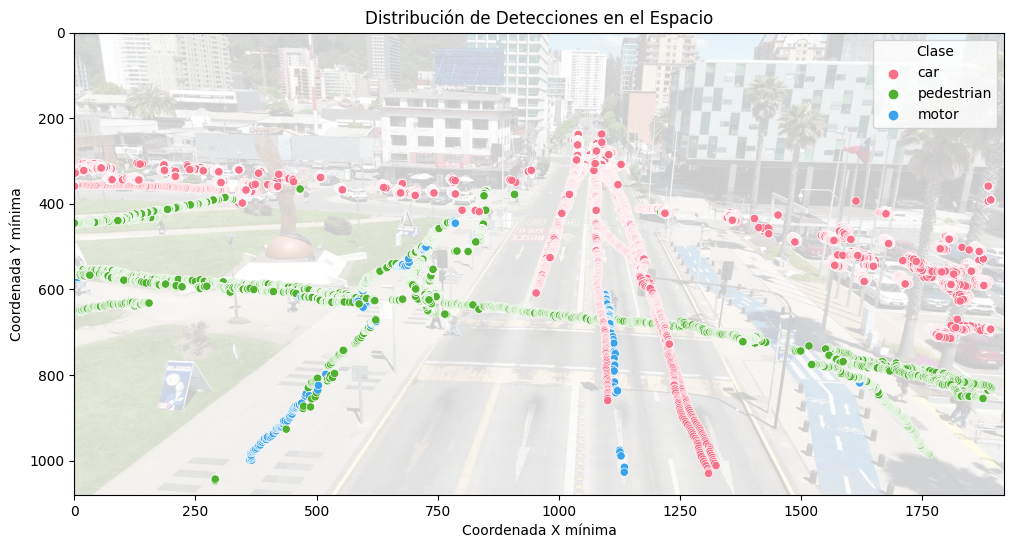

In [ ]:
# Gráfico Dispersión
img = mpimg.imread("frame_inicial.jpg") 
img_height, img_width, _ = img.shape

plt.figure(figsize=(12, 6))
plt.imshow(img, extent=[0, img_width, img_height, 0], aspect='auto', alpha=0.1)
sns.scatterplot(x=df["Xmin"], y=df["Ymin"], hue=df["Clase"], palette="husl")
plt.xlabel("Coordenada X mínima")
plt.ylabel("Coordenada Y mínima")
plt.title("Distribución de Detecciones en el Espacio")
plt.legend(title="Clase", bbox_to_anchor=(1, 1))
plt.show()

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

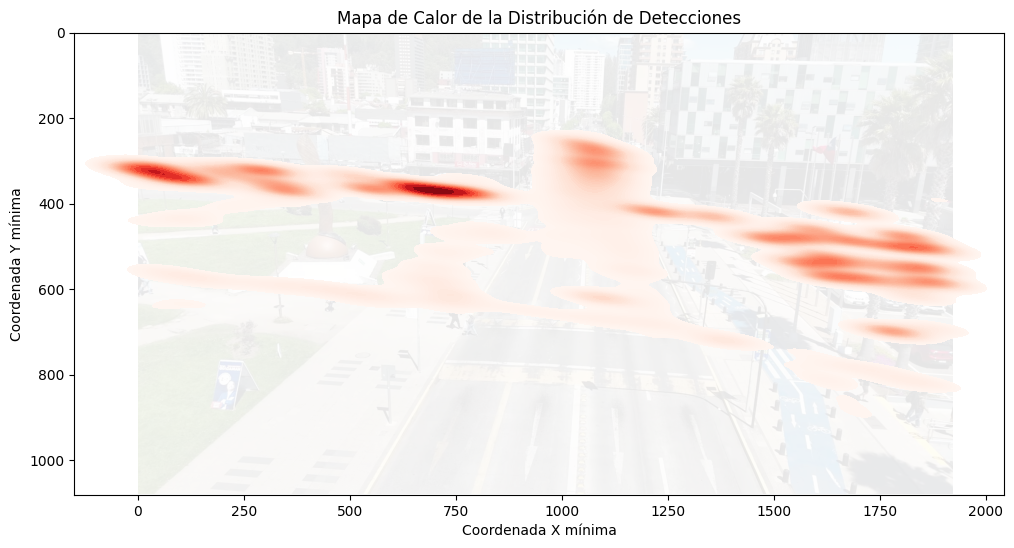

In [ ]:
#Mapa de Calor
plt.figure(figsize=(12, 6))
plt.imshow(img, extent=[0, img_width, img_height, 0], aspect='auto', alpha=0.1)
sns.kdeplot(x=df["Xmin"], y=df["Ymin"], cmap='Reds', fill=True, levels=50, bw_adjust=0.5)
plt.xlabel("Coordenada X mínima")
plt.ylabel("Coordenada Y mínima")
plt.title("Mapa de Calor de la Distribución de Detecciones")

plt.show()